<a href="https://colab.research.google.com/github/Shivamthakur7500/EarthQuack_EDA-project/blob/main/project_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: how to load data from a google drive

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/project data.csv'



Mounted at /content/drive


In [4]:
df = pd.read_csv(file_path)
df.head() # Display the first few rows of the DataFrame


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-21T15:46:59.478Z,-56.1274,-27.9666,115.188,5.1,mb,42.0,69.0,5.218,0.89,...,2025-04-21T16:06:18.040Z,South Sandwich Islands region,earthquake,11.40,7.696,0.090,40.0,reviewed,us,us
1,2025-04-21T15:18:15.745Z,62.2263,-151.0108,66.400,2.8,ml,NaN,NaN,NaN,0.38,...,2025-04-21T15:20:07.932Z,"32 km SSW of Petersville, Alaska",earthquake,NaN,0.800,NaN,NaN,automatic,ak,ak
2,2025-04-21T11:39:16.048Z,61.6038,-146.7293,27.100,2.6,ml,NaN,NaN,NaN,0.38,...,2025-04-21T12:41:05.040Z,"43 km S of Nelchina, Alaska",earthquake,NaN,0.200,NaN,NaN,automatic,ak,ak
3,2025-04-21T10:42:04.429Z,30.1653,51.9590,10.000,4.4,mb,45.0,89.0,6.421,1.28,...,2025-04-21T12:45:55.040Z,"42 km E of Nūrābād, Iran",earthquake,9.78,1.953,0.085,40.0,reviewed,us,us
4,2025-04-21T09:28:18.664Z,-18.2225,-178.1082,560.233,4.4,mb,54.0,75.0,2.968,0.83,...,2025-04-21T09:54:24.040Z,"273 km E of Levuka, Fiji",earthquake,12.96,7.631,0.053,102.0,reviewed,us,us


In [5]:
df.shape

(6386, 22)

In [6]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,6386.000000,6386.000000,6386.000000,6386.000000,5841.000000,5841.000000,5841.000000,6386.000000,5780.000000,6386.000000,5811.000000,5835.000000
mean,20.845731,-27.437061,62.400313,3.874851,44.076186,132.281332,2.382639,0.620510,6.822181,4.578370,0.114783,37.237189
std,30.062549,125.095147,111.798733,0.854196,37.220606,72.138740,3.934430,0.287316,4.335676,13.988455,0.055895,53.505464
min,-73.220400,-179.996800,-2.950000,2.500000,3.000000,11.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,-4.709750,-151.947325,10.000000,3.000000,19.000000,75.000000,0.539000,0.420000,3.990000,1.822000,0.077000,12.000000
50%,27.487700,-66.963483,15.105000,4.200000,32.000000,115.000000,1.318000,0.630000,6.445000,1.970000,0.105000,21.000000
75%,48.234650,119.392875,60.851250,4.500000,55.000000,186.000000,2.657000,0.820000,9.450000,6.645500,0.141000,40.000000
max,86.322700,179.985500,650.629000,7.700000,437.000000,353.000000,52.015000,2.100000,40.010000,1026.000000,0.530000,802.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6386 entries, 0 to 6385
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             6386 non-null   object 
 1   latitude         6386 non-null   float64
 2   longitude        6386 non-null   float64
 3   depth            6386 non-null   float64
 4   mag              6386 non-null   float64
 5   magType          6386 non-null   object 
 6   nst              5841 non-null   float64
 7   gap              5841 non-null   float64
 8   dmin             5841 non-null   float64
 9   rms              6386 non-null   float64
 10  net              6386 non-null   object 
 11  id               6386 non-null   object 
 12  updated          6386 non-null   object 
 13  place            6386 non-null   object 
 14  type             6386 non-null   object 
 15  horizontalError  5780 non-null   float64
 16  depthError       6386 non-null   float64
 17  magError      

In [8]:
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,545
gap,545
dmin,545
rms,0


In [9]:
import numpy as np

useless_col=list(df.columns[10:13]) + [df.columns[14]] + [df.columns[19]] +list(df.columns[21:])
# useless_col=useless_col.pop(5)
print(useless_col)
df=df.drop(useless_col,axis=1)
df



['net', 'id', 'updated', 'type', 'status', 'magSource']


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,place,horizontalError,depthError,magError,magNst,locationSource
0,2025-04-21T15:46:59.478Z,-56.1274,-27.9666,115.188,5.1,mb,42.0,69.0,5.218,0.89,South Sandwich Islands region,11.40,7.696,0.090,40.0,us
1,2025-04-21T15:18:15.745Z,62.2263,-151.0108,66.400,2.8,ml,NaN,NaN,NaN,0.38,"32 km SSW of Petersville, Alaska",NaN,0.800,NaN,NaN,ak
2,2025-04-21T11:39:16.048Z,61.6038,-146.7293,27.100,2.6,ml,NaN,NaN,NaN,0.38,"43 km S of Nelchina, Alaska",NaN,0.200,NaN,NaN,ak
3,2025-04-21T10:42:04.429Z,30.1653,51.9590,10.000,4.4,mb,45.0,89.0,6.421,1.28,"42 km E of Nūrābād, Iran",9.78,1.953,0.085,40.0,us
4,2025-04-21T09:28:18.664Z,-18.2225,-178.1082,560.233,4.4,mb,54.0,75.0,2.968,0.83,"273 km E of Levuka, Fiji",12.96,7.631,0.053,102.0,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6381,2025-01-14T01:31:39.719Z,9.0032,39.9748,10.000,4.6,mb,39.0,134.0,1.284,0.59,"13 km NNE of Metahāra, Ethiopia",9.36,1.951,0.103,28.0,us
6382,2025-01-14T00:43:08.674Z,40.5387,63.3168,16.860,4.2,mb,32.0,130.0,3.389,0.62,"46 km NNW of Gazli, Uzbekistan",9.61,6.730,0.200,7.0,us
6383,2025-01-14T00:33:06.911Z,50.7625,-177.1957,10.000,3.4,ml,21.0,235.0,1.001,0.29,"129 km SSW of Adak, Alaska",4.64,1.950,0.097,14.0,us
6384,2025-01-14T00:23:29.517Z,-20.2622,-69.2372,91.224,4.6,mb,44.0,144.0,0.592,0.53,"44 km E of La Tirana, Chile",5.35,3.813,0.077,50.0,us


In [10]:
df.shape

(6386, 16)

In [11]:
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,545
gap,545
dmin,545
rms,0


In [12]:
df.duplicated().sum()

np.int64(1)

In [13]:
df=df.dropna()
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,0
gap,0
dmin,0
rms,0


In [14]:
df.shape

(5755, 16)

In [15]:
df.size

92080

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5755 entries, 0 to 6385
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             5755 non-null   object 
 1   latitude         5755 non-null   float64
 2   longitude        5755 non-null   float64
 3   depth            5755 non-null   float64
 4   mag              5755 non-null   float64
 5   magType          5755 non-null   object 
 6   nst              5755 non-null   float64
 7   gap              5755 non-null   float64
 8   dmin             5755 non-null   float64
 9   rms              5755 non-null   float64
 10  place            5755 non-null   object 
 11  horizontalError  5755 non-null   float64
 12  depthError       5755 non-null   float64
 13  magError         5755 non-null   float64
 14  magNst           5755 non-null   float64
 15  locationSource   5755 non-null   object 
dtypes: float64(12), object(4)
memory usage: 764.3+ KB


In [17]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000
mean,16.917824,-14.615369,65.027778,3.976712,44.043093,132.571851,2.414520,0.626902,6.847606,4.727774,0.113458,37.627454
std,28.965657,124.231870,116.601806,0.823573,36.929978,72.008456,3.954842,0.291606,4.325738,4.998544,0.053450,53.765369
min,-73.220400,-179.996600,-2.950000,2.500000,3.000000,11.000000,0.000000,0.000000,0.070000,0.090000,0.000000,0.000000
25%,-6.273200,-124.655000,10.000000,3.200000,20.000000,75.000000,0.560550,0.420000,4.040000,1.872000,0.077000,12.000000
50%,19.307500,-62.757700,14.520000,4.200000,32.000000,115.000000,1.340200,0.640000,6.460000,2.001000,0.105000,21.000000
75%,39.504400,123.441400,61.978500,4.500000,55.000000,186.000000,2.692000,0.830000,9.475000,7.080500,0.140000,40.000000
max,86.322700,179.985500,650.629000,7.700000,437.000000,353.000000,52.015000,1.860000,40.010000,37.850000,0.530000,802.000000


In [18]:
df.duplicated().sum()

np.int64(1)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5755 entries, 0 to 6385
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             5755 non-null   object 
 1   latitude         5755 non-null   float64
 2   longitude        5755 non-null   float64
 3   depth            5755 non-null   float64
 4   mag              5755 non-null   float64
 5   magType          5755 non-null   object 
 6   nst              5755 non-null   float64
 7   gap              5755 non-null   float64
 8   dmin             5755 non-null   float64
 9   rms              5755 non-null   float64
 10  place            5755 non-null   object 
 11  horizontalError  5755 non-null   float64
 12  depthError       5755 non-null   float64
 13  magError         5755 non-null   float64
 14  magNst           5755 non-null   float64
 15  locationSource   5755 non-null   object 
dtypes: float64(12), object(4)
memory usage: 764.3+ KB


In [21]:
import plotly.express as px

fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',

                     color='mag',
                     color_continuous_scale='Viridis',
                     title='Global Earthquake Locations by Magnitude')
fig.show()


##CONCLUSION
Here From the above graph we can conclude that number of earthquack occurs as per it latitude and longitude
we can say that :
1. The most earthquack prone Area is  "Indo- Pacific Region".
  
  -> More - precisely
    1. ("Sagaing, Myanmar (Burma)" latitude = 22.0014 , longitude = 95.9247 ,  mag = 7.7 )
    2.     
2. The second most EarthQuack prone area is "European Region".

0         (4.58, 5.1]
3        (4.06, 4.58]
4        (4.06, 4.58]
5         (5.1, 5.62]
6       (2.495, 3.02]
            ...      
6381      (4.58, 5.1]
6382     (4.06, 4.58]
6383     (3.02, 3.54]
6384      (4.58, 5.1]
6385     (3.54, 4.06]
Name: mag, Length: 5755, dtype: category
Categories (10, interval[float64, right]): [(2.495, 3.02] < (3.02, 3.54] < (3.54, 4.06] <
                                            (4.06, 4.58] ... (5.62, 6.14] < (6.14, 6.66] <
                                            (6.66, 7.18] < (7.18, 7.7]] 0        (62.408, 127.766]
3         (-3.604, 62.408]
4       (519.913, 585.271]
5         (-3.604, 62.408]
6         (-3.604, 62.408]
               ...        
6381      (-3.604, 62.408]
6382      (-3.604, 62.408]
6383      (-3.604, 62.408]
6384     (62.408, 127.766]
6385      (-3.604, 62.408]
Name: depth, Length: 5755, dtype: category
Categories (10, interval[float64, right]): [(-3.604, 62.408] < (62.408, 127.766] <
                                         

<ipython-input-22-86f678a0fee4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-86f678a0fee4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-86f678a0fee4>:6: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



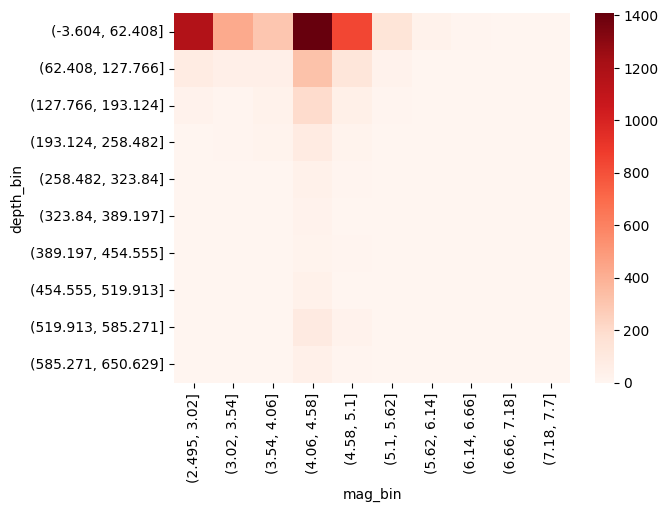

<Figure size 600x1000 with 0 Axes>

In [22]:
mag_range=pd.cut(df['mag'],bins=10);
depth_range=pd.cut(df['depth'],bins=10);
print(mag_range,depth_range)
df['mag_bin'] = mag_range
df['depth_bin'] = depth_range
pivot = df.pivot_table(index='depth_bin', columns='mag_bin', aggfunc='size', fill_value=0)
sns.heatmap(pivot,cmap='Reds')
plt.figure(figsize=(6,10))
plt.show()

In [23]:
time=[t.split("T")[1] for t in df['time']]

time=[t.split('.')[0] for t in time]



In [24]:
 df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,place,horizontalError,depthError,magError,magNst,locationSource,mag_bin,depth_bin
0,2025-04-21T15:46:59.478Z,-56.127400,-27.966600,115.188,5.10,mb,42.0,69.0,5.21800,0.89,South Sandwich Islands region,11.40,7.696,0.090000,40.0,us,"(4.58, 5.1]","(62.408, 127.766]"
3,2025-04-21T10:42:04.429Z,30.165300,51.959000,10.000,4.40,mb,45.0,89.0,6.42100,1.28,"42 km E of Nūrābād, Iran",9.78,1.953,0.085000,40.0,us,"(4.06, 4.58]","(-3.604, 62.408]"
4,2025-04-21T09:28:18.664Z,-18.222500,-178.108200,560.233,4.40,mb,54.0,75.0,2.96800,0.83,"273 km E of Levuka, Fiji",12.96,7.631,0.053000,102.0,us,"(4.06, 4.58]","(519.913, 585.271]"
5,2025-04-21T07:53:12.193Z,-1.213600,-15.884600,10.000,5.20,mb,66.0,44.0,6.84500,0.49,north of Ascension Island,9.41,1.837,0.035000,262.0,us,"(5.1, 5.62]","(-3.604, 62.408]"
6,2025-04-21T07:40:31.180Z,18.039167,-66.789833,16.120,2.76,md,19.0,138.0,0.09994,0.25,"2 km N of Guayanilla, Puerto Rico",0.47,0.970,0.090724,7.0,pr,"(2.495, 3.02]","(-3.604, 62.408]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6381,2025-01-14T01:31:39.719Z,9.003200,39.974800,10.000,4.60,mb,39.0,134.0,1.28400,0.59,"13 km NNE of Metahāra, Ethiopia",9.36,1.951,0.103000,28.0,us,"(4.58, 5.1]","(-3.604, 62.408]"
6382,2025-01-14T00:43:08.674Z,40.538700,63.316800,16.860,4.20,mb,32.0,130.0,3.38900,0.62,"46 km NNW of Gazli, Uzbekistan",9.61,6.730,0.200000,7.0,us,"(4.06, 4.58]","(-3.604, 62.408]"
6383,2025-01-14T00:33:06.911Z,50.762500,-177.195700,10.000,3.40,ml,21.0,235.0,1.00100,0.29,"129 km SSW of Adak, Alaska",4.64,1.950,0.097000,14.0,us,"(3.02, 3.54]","(-3.604, 62.408]"
6384,2025-01-14T00:23:29.517Z,-20.262200,-69.237200,91.224,4.60,mb,44.0,144.0,0.59200,0.53,"44 km E of La Tirana, Chile",5.35,3.813,0.077000,50.0,us,"(4.58, 5.1]","(62.408, 127.766]"


In [25]:

# print(f'{data}\n')
# print(data[0])
# print("\nloop opt:\n",[i for i in data])

0     1.240017
1     0.872215
2     2.133249
3     0.000000
4     4.319042
5     0.010509
6     1.250525
7    50.000000
8     0.147121
9     0.294241
dtype: float64 

locationSource
ci     120
hv      85
nc     205
nm       2
pr     413
se       3
tx     121
us    4760
uu      16
uw      30
Name: count, dtype: int64 



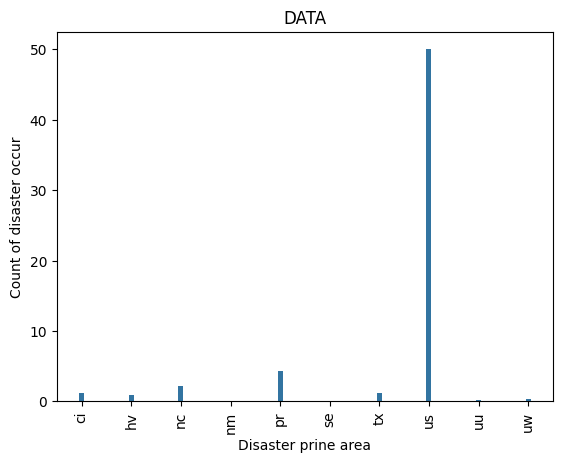

In [26]:
data=df.groupby(df['locationSource'])['locationSource'].value_counts()
def normalization(series,mini,maxi):
  min_series = series.min()
  max_series = series.max()
  normailized_data= (series - min_series) / (max_series - min_series) * ((maxi - mini) + mini)*5

  return normailized_data
# Store the result of the normalization function in the 'normailized_data' variable
normailized_data = normalization(pd.Series([i for i in data]),1,10)
print(normailized_data,'\n')
print(data,'\n')
sns.barplot(x=data.index,y=normailized_data,width=.1)
plt.xticks(rotation=90)
plt.xlabel("Disaster prine area")
plt.ylabel("Count of disaster occur")
plt.title("DATA")
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5755 entries, 0 to 6385
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   time             5755 non-null   object  
 1   latitude         5755 non-null   float64 
 2   longitude        5755 non-null   float64 
 3   depth            5755 non-null   float64 
 4   mag              5755 non-null   float64 
 5   magType          5755 non-null   object  
 6   nst              5755 non-null   float64 
 7   gap              5755 non-null   float64 
 8   dmin             5755 non-null   float64 
 9   rms              5755 non-null   float64 
 10  place            5755 non-null   object  
 11  horizontalError  5755 non-null   float64 
 12  depthError       5755 non-null   float64 
 13  magError         5755 non-null   float64 
 14  magNst           5755 non-null   float64 
 15  locationSource   5755 non-null   object  
 16  mag_bin          5755 non-null   category
 17  

<ipython-input-28-403d85eff1c3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-403d85eff1c3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



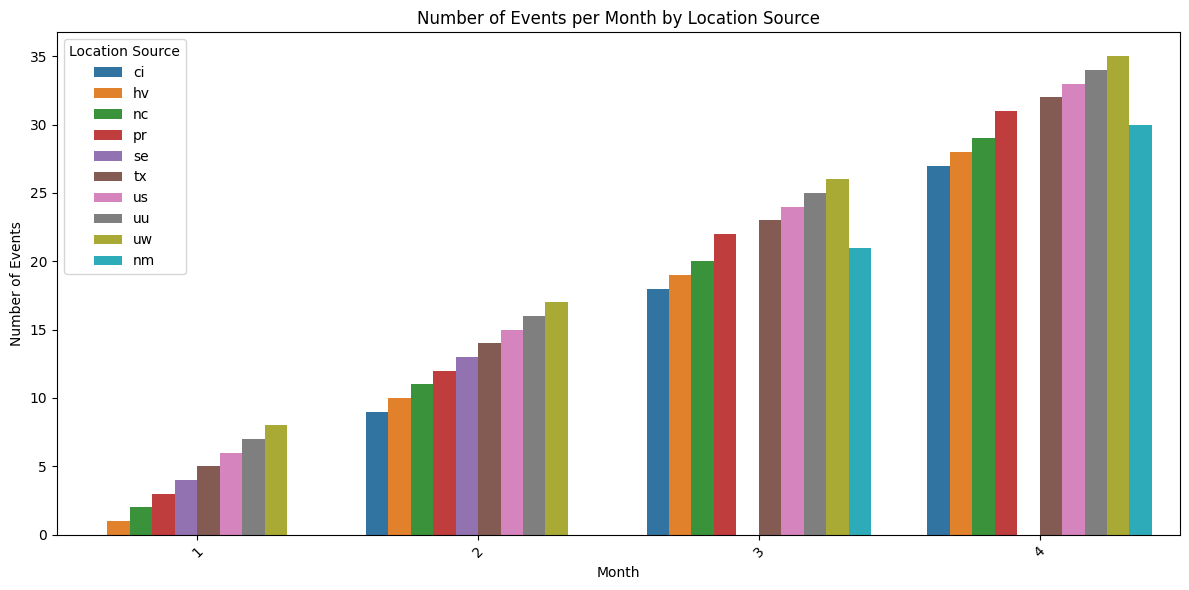

In [28]:

df['time'] = pd.to_datetime(df['time'])


df['month'] = df['time'].dt.month


monthly_events = df.groupby(['month', 'locationSource']).size().reset_index(name='event_count')


plt.figure(figsize=(12, 6))
sns.barplot(x='month', y=monthly_events.index, hue='locationSource', data=monthly_events)
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.title('Number of Events per Month by Location Source')
plt.xticks(rotation=45)
plt.legend(title='Location Source')
plt.tight_layout()
plt.show()


<ipython-input-29-3420596c24ab>:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



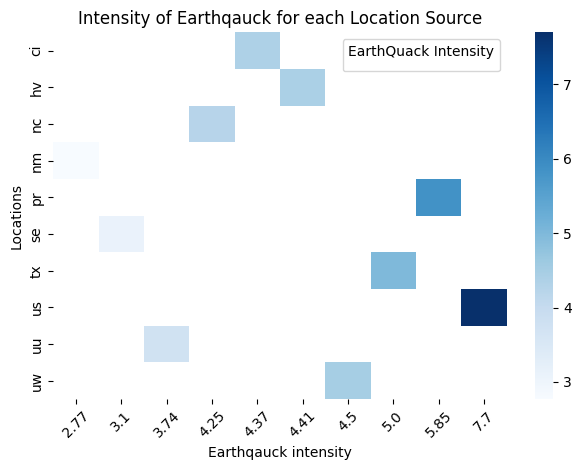

<Figure size 200x200 with 0 Axes>

  locationSource   mag
0             ci  4.37
1             hv  4.41
2             nc  4.25
3             nm  2.77
4             pr  5.85
5             se  3.10
6             tx  5.00
7             us  7.70
8             uu  3.74
9             uw  4.50


In [29]:
max_magnitude=df.groupby('locationSource')['mag'].max().reset_index()

heatmap_data = max_magnitude.pivot(index='locationSource', columns='mag', values='mag')
sns.heatmap(heatmap_data,cmap="Blues")
plt.ylabel('Locations')
plt.xlabel('Earthqauck intensity')
plt.title('Intensity of Earthqauck for each Location Source')
plt.xticks(rotation=45)
plt.legend(title='EarthQuack Intensity')
plt.tight_layout()
plt.figure(figsize=(2,2))
plt.show()
print(max_magnitude)

In [30]:
# prompt: how to divide the locations in continents on the basis of latitude and llongitude

def assign_continent(latitude, longitude):
    """Assigns a continent based on latitude and longitude."""

    if -90 <= latitude <= 90 and -180 <= longitude <= 180:  # Basic validation
        if latitude >= -35 and latitude <= 35 : # Approximate bounds for Africa
            if longitude <= 50 and longitude >= -20:
                return 'Africa'

        # ... Add more continent checks similarly using latitude and longitude ranges
        elif latitude >= 35: # Northen Hemisphere
            if longitude <= 180 and longitude >= -180: # All longitude
                if longitude <= 50:
                  return 'Europe'
                else:
                  return 'Asia'

        elif latitude <= -35:
            return 'Antartica'
        elif latitude >=-60 and latitude <=10:
             if longitude >=-115.42:
              return 'south America'
        else:
          return "Other"
    else:
        return 'Unknown' # Handle invalid coordinates


df['continent'] = df.apply(lambda row: assign_continent(row['latitude'], row['longitude']), axis=1)



<ipython-input-30-03343ebb33ff>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



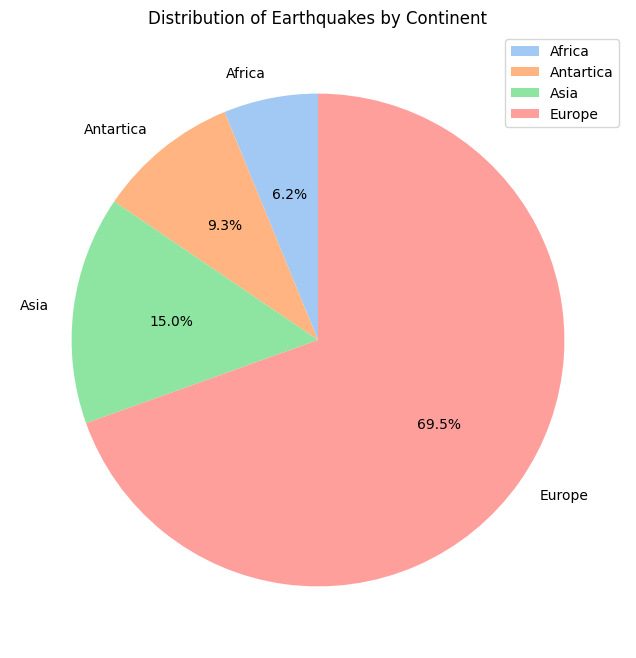

In [31]:
continent_based=df.groupby('continent')['mag'].count()
continent_based
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
sns.set_palette("pastel")  # Optional: Set a color palette
plt.pie(continent_based, labels=continent_based.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Earthquakes by Continent')
plt.legend()
plt.show()

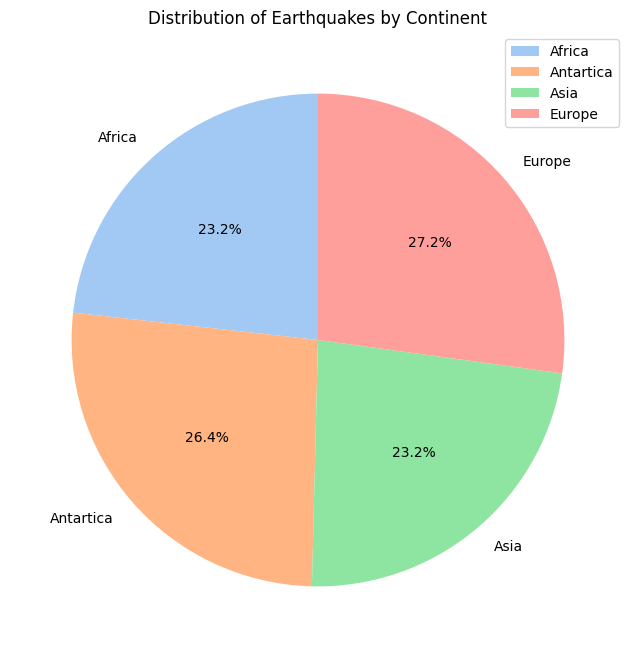

In [32]:
continent_max_intensity=df.groupby('continent')['mag'].max()
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
sns.set_palette("pastel")  # Optional: Set a color palette
plt.pie(continent_max_intensity, labels=continent_max_intensity.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Earthquakes by Continent')
plt.legend()
plt.show()

In [33]:
df.head().info()


<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 6
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             5 non-null      datetime64[ns, UTC]
 1   latitude         5 non-null      float64            
 2   longitude        5 non-null      float64            
 3   depth            5 non-null      float64            
 4   mag              5 non-null      float64            
 5   magType          5 non-null      object             
 6   nst              5 non-null      float64            
 7   gap              5 non-null      float64            
 8   dmin             5 non-null      float64            
 9   rms              5 non-null      float64            
 10  place            5 non-null      object             
 11  horizontalError  5 non-null      float64            
 12  depthError       5 non-null      float64            
 13  magError         5 non-null  

In [47]:
import numpy as np
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
x=np.array(df[['mag']])
y=np.array(df['depth'])

# print(df['mag'].corr(df['depth'],method='spearman'  ))


0.10971816813064851


In [35]:
model=LinearRegression()
model

LinearRegression()

In [63]:

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model.fit(x_train,y_train)

LinearRegression()

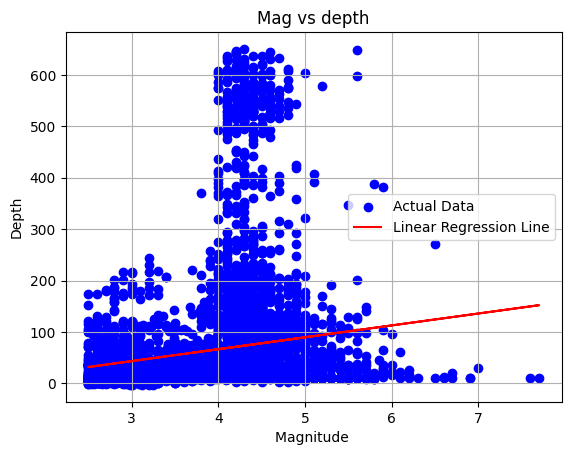

In [64]:
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, model.predict(x), color='red', label='Linear Regression Line')
plt.title('Mag vs depth')
plt.xlabel('Magnitude ')
plt.ylabel('Depth')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
from sklearn.linear_model import LinearRegression
df.head()





,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,place,horizontalError,depthError,magError,magNst,locationSource,mag_bin,depth_bin,month,continent
0,2025-04-21 15:46:59.478000+00:00,-56.127400,-27.966600,115.188,5.10,mb,42.0,69.0,5.21800,0.89,South Sandwich Islands region,11.40,7.696,0.090000,40.0,us,"(4.58, 5.1]","(62.408, 127.766]",4,Antartica
3,2025-04-21 10:42:04.429000+00:00,30.165300,51.959000,10.000,4.40,mb,45.0,89.0,6.42100,1.28,"42 km E of Nūrābād, Iran",9.78,1.953,0.085000,40.0,us,"(4.06, 4.58]","(-3.604, 62.408]",4,None
4,2025-04-21 09:28:18.664000+00:00,-18.222500,-178.108200,560.233,4.40,mb,54.0,75.0,2.96800,0.83,"273 km E of Levuka, Fiji",12.96,7.631,0.053000,102.0,us,"(4.06, 4.58]","(519.913, 585.271]",4,None
5,2025-04-21 07:53:12.193000+00:00,-1.213600,-15.884600,10.000,5.20,mb,66.0,44.0,6.84500,0.49,north of Ascension Island,9.41,1.837,0.035000,262.0,us,"(5.1, 5.62]","(-3.604, 62.408]",4,Africa
6,2025-04-21 07:40:31.180000+00:00,18.039167,-66.789833,16.120,2.76,md,19.0,138.0,0.09994,0.25,"2 km N of Guayanilla, Puerto Rico",0.47,0.970,0.090724,7.0,pr,"(2.495, 3.02]","(-3.604, 62.408]",4,None
